In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import timeit 


In [2]:
url = "https://raw.github.com/mattdelhey/kaggle-titanic/master/Data/train.csv"
titanic = pd.read_csv(url)


In [3]:
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [6]:
titanic['class']=titanic['pclass'].map({1: 'First', 2: "Second", 3: "Third"})

In [7]:
titanic.embarked.value_counts()
titanic["embark_town"] = titanic.embarked.map({"C": "Cherbourg", "Q":"Queensland", "S": "Southampton"})

In [8]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [9]:
titanic["alive"]= titanic.survived.map({0:"No", 1:"Yes"})

In [10]:
titanic.alive

0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
886     No
887    Yes
888     No
889    Yes
890     No
Name: alive, Length: 891, dtype: object

In [11]:
titanic = titanic.drop(["name", "ticket", "cabin", "embarked"], axis=1)

In [12]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alive
0,0,3,male,22.0,1,0,7.2500,Third,Southampton,No
1,1,1,female,38.0,1,0,71.2833,First,Cherbourg,Yes
2,1,3,female,26.0,0,0,7.9250,Third,Southampton,Yes
3,1,1,female,35.0,1,0,53.1000,First,Southampton,Yes
4,0,3,male,35.0,0,0,8.0500,Third,Southampton,No
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Second,Southampton,No
887,1,1,female,19.0,0,0,30.0000,First,Southampton,Yes
888,0,3,female,NaN,1,2,23.4500,Third,Southampton,No
889,1,1,male,26.0,0,0,30.0000,First,Cherbourg,Yes


In [13]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class',
       'embark_town', 'alive'],
      dtype='object')

In [14]:
titanic.to_csv("titanic.csv")

In [15]:
titanic.groupby("class")['fare'].sum()

class
First     18177.4125
Second     3801.8417
Third      6714.6951
Name: fare, dtype: float64

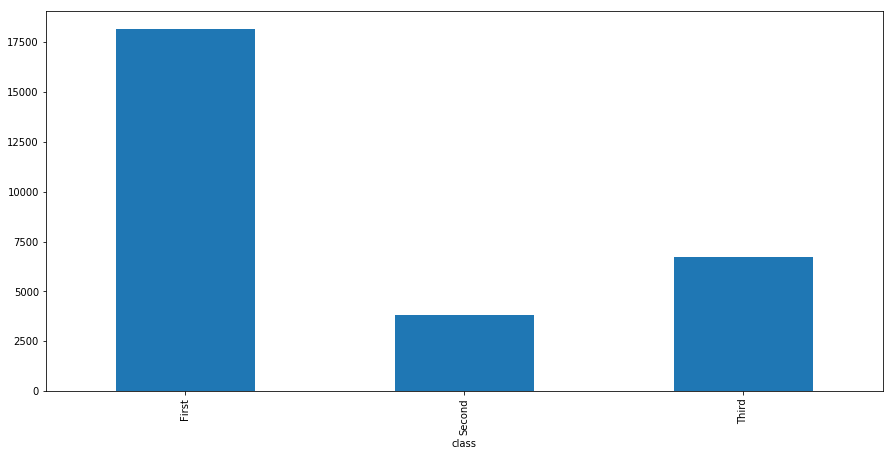

In [16]:
fig, ax = plt.subplots(figsize=(15,7))
titanic.groupby("class")["fare"].sum().plot(kind='bar')


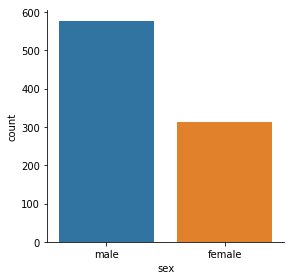

In [17]:
sns.factorplot(x="sex", data=titanic, kind='count')

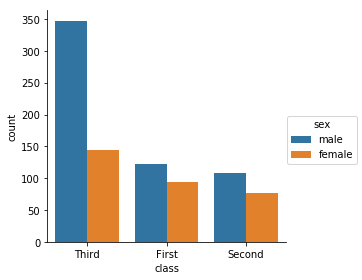

In [18]:
sns.factorplot(x="class", hue="sex", data=titanic, kind='count')